In [1]:
#Import Libraries
import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
#Matplot Images
import matplotlib.image as mpimg
# Tensflor and Keras Layer and Model and Optimize and Loss
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from tensorflow.keras.losses import BinaryCrossentropy
#Kernel Intilizer 
from sklearn.preprocessing import LabelEncoder
# import tensorflow_hub as hub
from tensorflow.keras.optimizers import Adam , Adamax
#PreTrained Model
from tensorflow.keras.applications import *
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
# Warnings Remove 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Directory containing the "Train" folder
directory = "C:/Users/mohan/Downloads/archive (44)/chest_xray/train"


filepath =[]
label = []

folds = os.listdir(directory)

for fold in folds:
    f_path = os.path.join(directory , fold)
    
    imgs = os.listdir(f_path)
    
    for img in imgs:
        
        img_path = os.path.join(f_path , img)
        filepath.append(img_path)
        label.append(fold)
        
#Concat data paths with labels
file_path_series = pd.Series(filepath , name= 'filepath')
Label_path_series = pd.Series(label , name = 'label')
df_train = pd.concat([file_path_series ,Label_path_series ] , axis = 1)

In [3]:
df_train

,filepath,label
0,C:/Users/mohan/Downloads/archive (44)/chest_xr...,NORMAL
1,C:/Users/mohan/Downloads/archive (44)/chest_xr...,NORMAL
2,C:/Users/mohan/Downloads/archive (44)/chest_xr...,NORMAL
3,C:/Users/mohan/Downloads/archive (44)/chest_xr...,NORMAL
4,C:/Users/mohan/Downloads/archive (44)/chest_xr...,NORMAL
...,...,...
5211,C:/Users/mohan/Downloads/archive (44)/chest_xr...,PNEUMONIA
5212,C:/Users/mohan/Downloads/archive (44)/chest_xr...,PNEUMONIA
5213,C:/Users/mohan/Downloads/archive (44)/chest_xr...,PNEUMONIA
5214,C:/Users/mohan/Downloads/archive (44)/chest_xr...,PNEUMONIA


In [4]:
# Directory containing the "Test" folder
directory = "C:/Users/mohan/Downloads/archive (44)/chest_xray/test"

filepath =[]
label = []

folds = os.listdir(directory)

for fold in folds:
    f_path = os.path.join(directory , fold)
    
    imgs = os.listdir(f_path)
    
    for img in imgs:
        
        img_path = os.path.join(f_path , img)
        filepath.append(img_path)
        label.append(fold)
        
#Concat data paths with labels
file_path_series = pd.Series(filepath , name= 'filepath')
Label_path_series = pd.Series(label , name = 'label')
df_test = pd.concat([file_path_series ,Label_path_series ] , axis = 1)

In [5]:
df_test

,filepath,label
0,C:/Users/mohan/Downloads/archive (44)/chest_xr...,NORMAL
1,C:/Users/mohan/Downloads/archive (44)/chest_xr...,NORMAL
2,C:/Users/mohan/Downloads/archive (44)/chest_xr...,NORMAL
3,C:/Users/mohan/Downloads/archive (44)/chest_xr...,NORMAL
4,C:/Users/mohan/Downloads/archive (44)/chest_xr...,NORMAL
...,...,...
619,C:/Users/mohan/Downloads/archive (44)/chest_xr...,PNEUMONIA
620,C:/Users/mohan/Downloads/archive (44)/chest_xr...,PNEUMONIA
621,C:/Users/mohan/Downloads/archive (44)/chest_xr...,PNEUMONIA
622,C:/Users/mohan/Downloads/archive (44)/chest_xr...,PNEUMONIA


In [6]:
# Shape
print(f"The shape of The Train data is: {df_train.shape}")
print(f"The shape of The Test data is: {df_test.shape}")

The shape of The Train data is: (5216, 2)
The shape of The Test data is: (624, 2)


Making Train Test And Validation Datasets

In [7]:
#Data_Dir
data_dir = 'C:/Users/mohan/Downloads/archive (44)/chest_xray/train'
test_dir = 'C:/Users/mohan/Downloads/archive (44)/chest_xray/test'

IMAGE_SIZE = (256,256)

print('Training Images:')
# Creating the training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset='training',
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)

#Testing  Data
print('Validation Images:')
validation_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir, 
    validation_split=0.1,
    subset='validation',
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)

print('Testing Images:')
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir, 
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)

Training Images:
Found 5216 files belonging to 2 classes.
Using 4695 files for training.
Validation Images:
Found 5216 files belonging to 2 classes.
Using 521 files for validation.
Testing Images:
Found 624 files belonging to 2 classes.


Encoding Labels

In [8]:
# Extract labels
train_labels = train_ds.class_names
test_labels = test_ds.class_names
validation_labels = validation_ds.class_names

# Encode Labels

# Define your class labels
class_labels = ['NORMAL', 'PNEUMONIA'] 

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder on the class labels
label_encoder.fit(class_labels)

# Transform the labels for training dataset
train_labels_encoded = label_encoder.transform(train_labels)

# Transform the labels for validation dataset

validation_labels_encoded = label_encoder.transform(validation_labels)

# Transform the labels for test dataset
test_labels_encoded = label_encoder.transform(test_labels)

In [9]:
# Shape of the dataset
for image_batch, labels_batch in train_ds:
    print("Shape of X_train: ", image_batch.shape)
    print("Shape of y_train: ", labels_batch.shape)
    break

Shape of X_train:  (32, 256, 256, 3)
Shape of y_train:  (32,)


In [10]:
# Normalizing Pixel Values 

# Train Data 
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
# Val Data
validation_ds = validation_ds.map(lambda x, y: (x / 255.0, y))
# Test Data
test_ds = test_ds.map(lambda x, y: (x / 255.0, y))

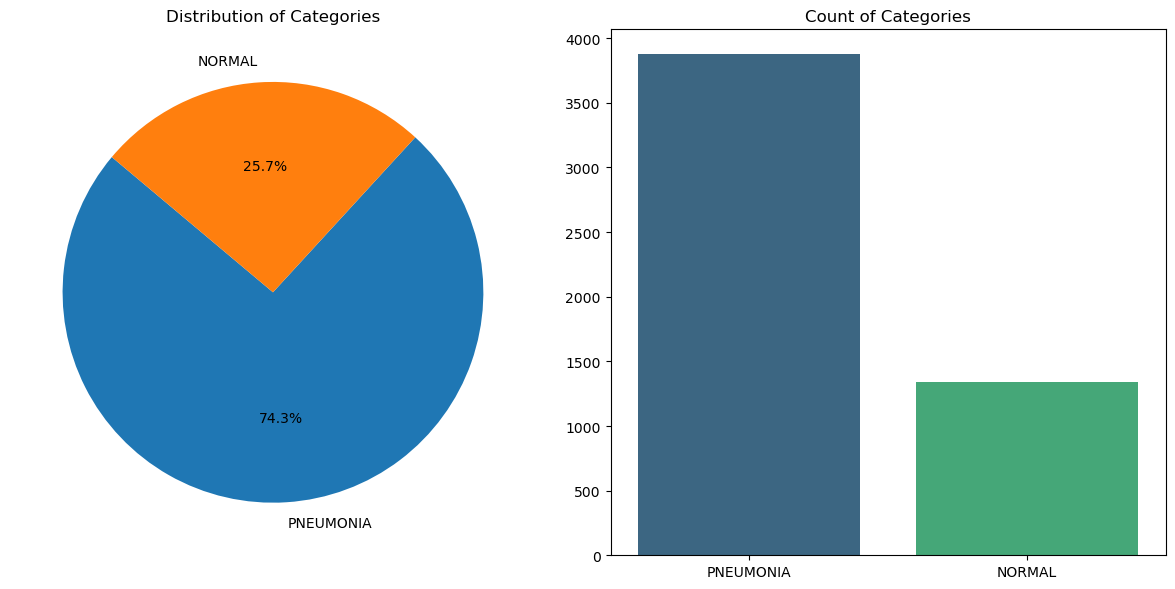

In [11]:
#Visual Count Of Train Labels
# Count the occurrences of each category in the 'category' column
count = df_train['label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

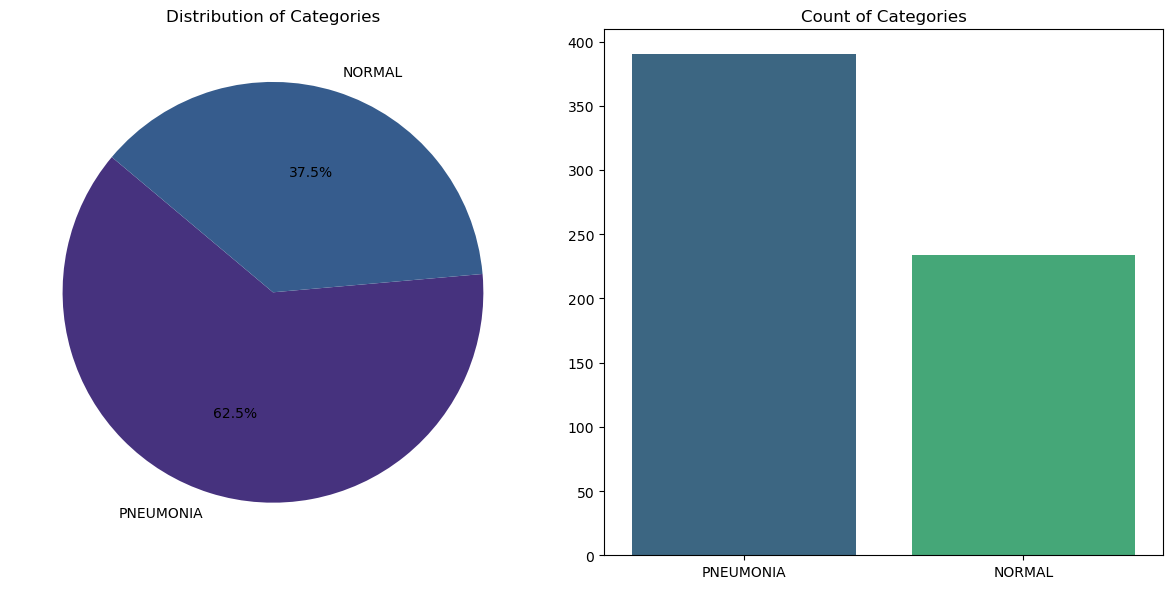

In [12]:
#Visual Count of Test Label
# Count the occurrences of each category in the 'category' column
count = df_test['label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
#Visualizing Train Images
def visualize_images(path, num_images=5):
    # Get a list of image filenames in the specified path
    image_filenames = os.listdir(path)
    
    # Limit the number of images to visualize if there are more than num_images
    num_images = min(num_images, len(image_filenames))
    
    # Create a figure and axis object to display images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3),facecolor='white')
    
    # Iterate over the selected images and display them
    for i, image_filename in enumerate(image_filenames[:num_images]):
        # Load the image using Matplotlib
        image_path = os.path.join(path, image_filename)
        image = mpimg.imread(image_path)
        
        # Display the image
        axes[i].imshow(image)
        axes[i].axis('off')  # Turn off axis
        axes[i].set_title(image_filename)  # Set image filename as title
    
    # Adjust layout and display the figure
    plt.tight_layout()
    plt.show()

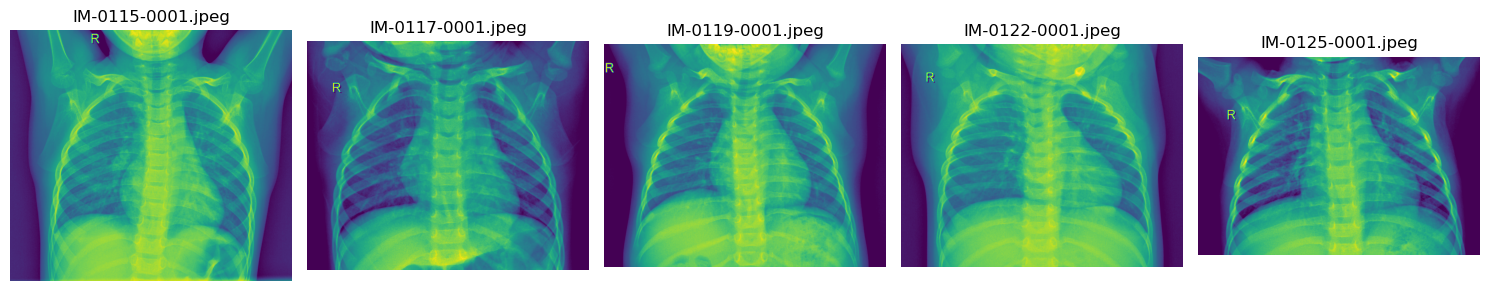

In [14]:
#Normal Images
# Specify the path containing the images to visualize
path_to_visualize = "C:/Users/mohan/Downloads/archive (44)/chest_xray/train/NORMAL"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

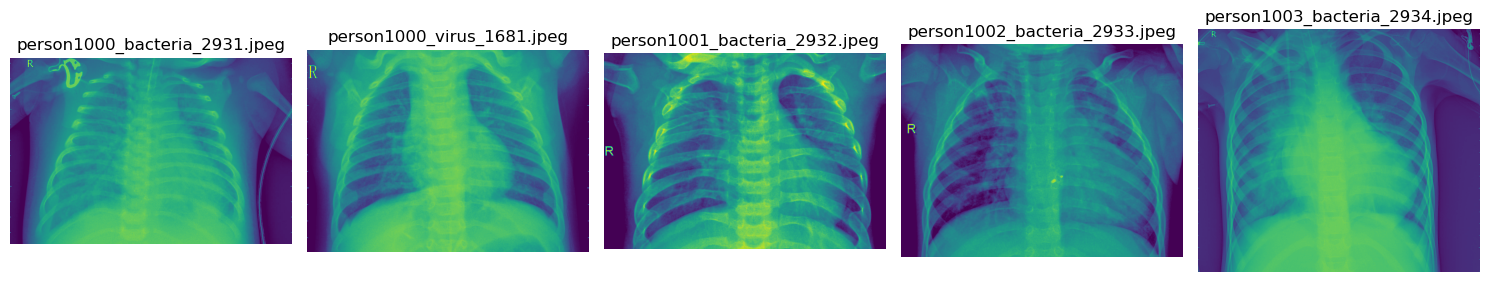

In [15]:
#Pneuomonia Images
# Specify the path containing the images to visualize
path_to_visualize = "C:/Users/mohan/Downloads/archive (44)/chest_xray/train/PNEUMONIA"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, Dense
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import Adamax

# Load the Xception base model without the top (classification) layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the layers in the base model
base_model.trainable = False

# Build Model
model = Sequential()

# Base Model
model.add(base_model)

# Add additional Conv2D layers
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Flatten the output of the Conv2D layers
model.add(Flatten())

# Add Dense Layers
model.add(Dropout(0.45))
model.add(Dense(220, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(60, activation='relu'))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer=Adamax(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 128)         2359424   
                                                                 
 max_pooling2d (MaxPooling2  (None, 4, 4, 128)         0         
 D)                                                              
                                                                 
 batch_normalization_4 (Bat  (None, 4, 4, 128)         512       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 64)          0

In [17]:
#Compile and Fitting
#Early_Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#Fitting Model
history = model.fit_generator(train_ds,
                        epochs= 20,
                        validation_data = validation_ds,
                        callbacks = early_stopping)

Epoch 1/20
147/147 [==============================] - 331s 2s/step - loss: 0.1727 - accuracy: 0.9308 - val_loss: 0.2627 - val_accuracy: 0.8983
Epoch 2/20
147/147 [==============================] - 352s 2s/step - loss: 0.1026 - accuracy: 0.9625 - val_loss: 0.1260 - val_accuracy: 0.9482
Epoch 3/20
147/147 [==============================] - 355s 2s/step - loss: 0.0775 - accuracy: 0.9727 - val_loss: 0.0780 - val_accuracy: 0.9712
Epoch 4/20
147/147 [==============================] - 352s 2s/step - loss: 0.0624 - accuracy: 0.9772 - val_loss: 0.1151 - val_accuracy: 0.9597
Epoch 5/20
147/147 [==============================] - 355s 2s/step - loss: 0.0466 - accuracy: 0.9840 - val_loss: 0.0775 - val_accuracy: 0.9731
Epoch 6/20
147/147 [==============================] - 354s 2s/step - loss: 0.0333 - accuracy: 0.9889 - val_loss: 0.1088 - val_accuracy: 0.9693
Epoch 7/20
147/147 [==============================] - 346s 2s/step - loss: 0.0186 - accuracy: 0.9932 - val_loss: 0.0517 - val_accuracy: 0.9846

In [18]:
#Value loss and accuracy
# Evaluate the model on the validation dataset
validation_loss, validation_accuracy = model.evaluate(validation_ds)

# Print the validation loss and accuracy
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

17/17 [==============================] - 33s 2s/step - loss: 0.0517 - accuracy: 0.9846
Validation Loss: 0.05165230855345726
Validation Accuracy: 0.984644889831543


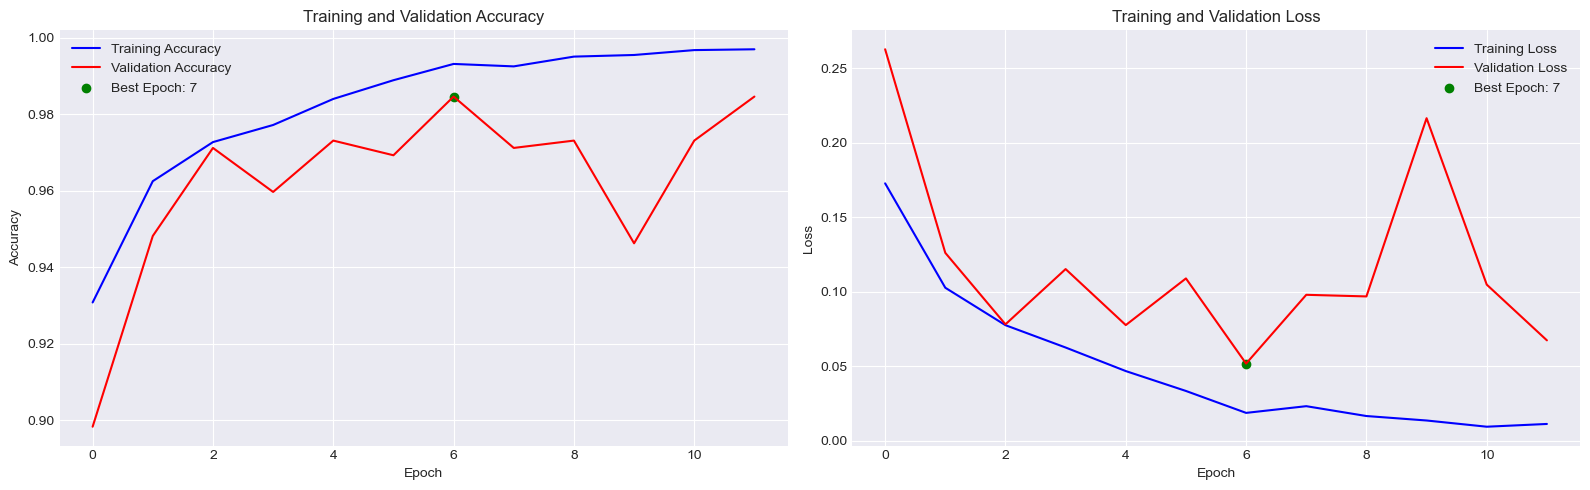

In [19]:
# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Set the background style
plt.style.use('seaborn-darkgrid')

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

Testing Images:
Found 624 files belonging to 2 classes.
Testing Images:
20/20 [==============================] - 40s 2s/step


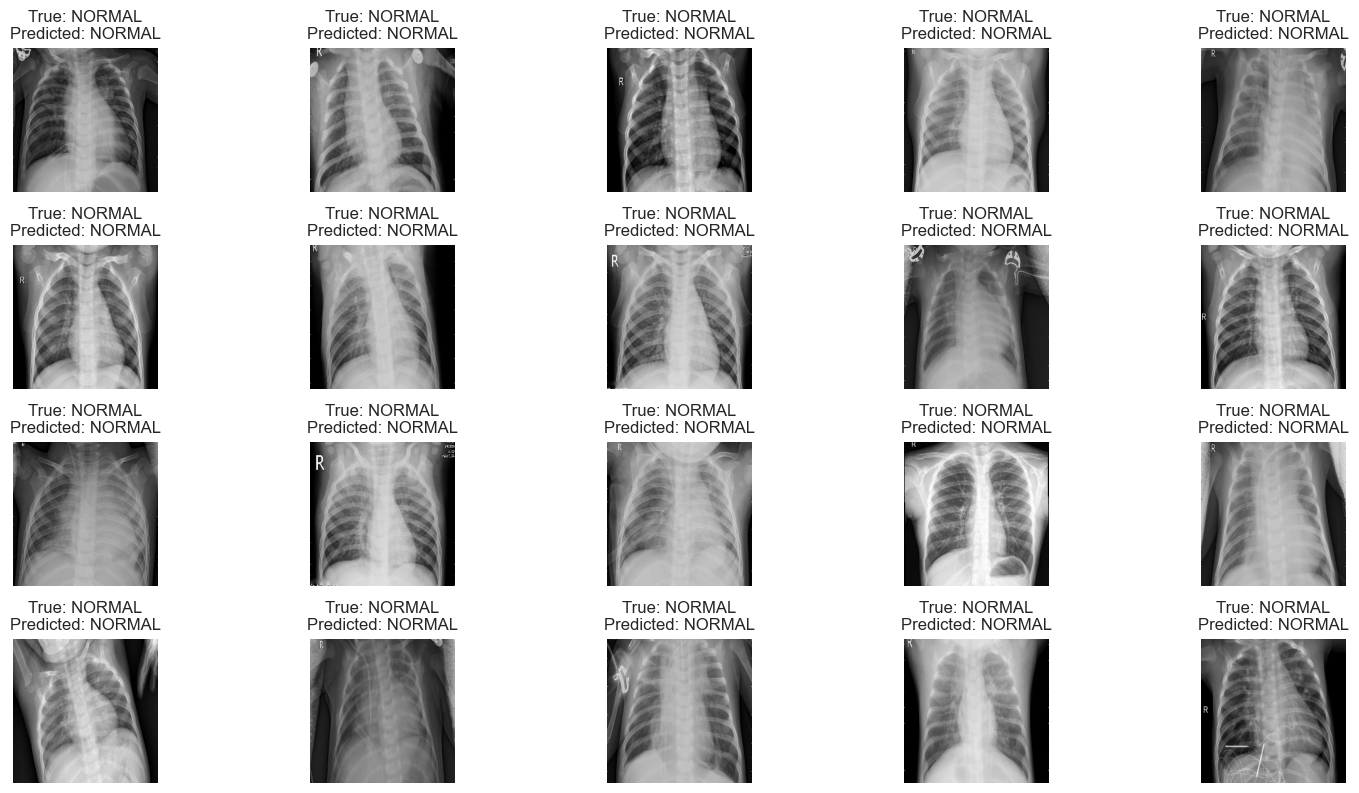

In [20]:
#Model Predictions
test_dir = 'C:/Users/mohan/Downloads/archive (44)/chest_xray/test'
print('Testing Images:')
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir, 
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)

# Define a function to plot images with their true and predicted labels
def plot_images_with_predictions(model, dataset, class_labels, num_images=40, num_images_per_row=5):
    # Generate predictions for a set number of images
    predictions = model.predict(dataset)
    
    # Shuffle the dataset
    dataset_shuffled = dataset.shuffle(buffer_size=len(dataset))
    
    plt.figure(figsize=(15, 10))
    for i, (images, labels) in enumerate(dataset_shuffled.take(num_images)):
        # Convert tensor to NumPy array
        images = images.numpy()
        
        # Iterate over each image in the batch
        for j in range(len(images)):
            if i * num_images_per_row + j < num_images:  # Check if the total number of images exceeds the desired count
                predicted_class = class_labels[np.argmax(predictions[i * num_images_per_row + j])]
                true_class = class_labels[np.argmax(labels[j])]
                
                plt.subplot(num_images // num_images_per_row + 1, num_images_per_row, i * num_images_per_row + j + 1)
                plt.imshow(images[j].astype("uint8"))  
                plt.title(f'True: {true_class}\nPredicted: {predicted_class}')
                plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize predictions on random 20 images from the testing dataset
print('Testing Images:')
plot_images_with_predictions(model, test_ds, class_labels, num_images=20)

1/1 [==============================] - 0s 124ms/step


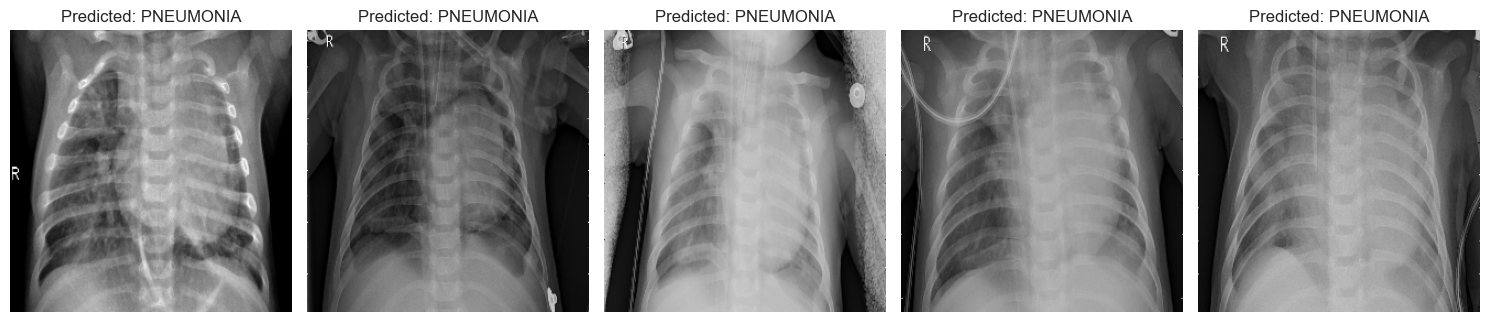

In [21]:
# Path to the directory containing the images
directory_path = 'C:/Users/mohan/Downloads/archive (44)/chest_xray/test/PNEUMONIA'

# Select N image files from the directory
image_files = os.listdir(directory_path)[:5]

# Create a figure and axes for subplots
fig, axs = plt.subplots(1, len(image_files), figsize=(15, 5))

# Load and preprocess each image, make predictions, and display them using a loop
for i, image_file in enumerate(image_files):
    img_path = os.path.join(directory_path, image_file)
    # Load the image using OpenCV
    img = cv2.imread(img_path)
    # Resize the image to (256, 256)
    img = cv2.resize(img, (256, 256)) 
    # Normalize pixel values
    img_array = img.astype(np.float32) / 255.0  

    # Expand the dimensions to match the input shape expected by the model
    img_array = np.expand_dims(img_array, axis=0)

    # Make predictions
    predictions = model.predict(img_array)
    actual_prediction = (predictions > 0.5).astype(int)

    # Display the image with predicted label
    # Convert BGR to RGB for displaying with matplotlib
    axs[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  
    axs[i].axis('off')
    if actual_prediction[0][0] == 0:
        predicted_label = 'Normal'
    else:
        predicted_label = 'PNEUMONIA'
    axs[i].set_title(f'Predicted: {predicted_label}')

# Adjust layout
plt.tight_layout()
plt.show()

In [22]:
import tensorflow as tf

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model
with open('pneumonia_detection_model.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\mohan\AppData\Local\Temp\tmpbaikt_em\assets


INFO:tensorflow:Assets written to: C:\Users\mohan\AppData\Local\Temp\tmpbaikt_em\assets


In [23]:
# After training your model
model.save('pneumonia_detection_model.h5')


In [24]:
from keras.layers import BatchNormalization

# Correct usage
batch_norm_layer = BatchNormalization(axis=3)


In [25]:
# Load the trained model
import tensorflow as tf
model = tf.keras.models.load_model('pneumonia_detection_model.h5')

# Identify the last convolutional layer
for layer in reversed(model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer_name = layer.name
        break

print(f"Last convolutional layer: {last_conv_layer_name}")


Last convolutional layer: conv2d_5


In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Create a model that maps the input image to the activations of the last conv layer
    grad_model = tf.keras.models.Model(
        [model.inputs], 
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Record operations for automatic differentiation
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # Compute gradients of the top predicted class w.r.t. the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Compute the mean intensity of the gradient over the channels
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by the corresponding pooled gradient
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Apply ReLU to the heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [27]:
def superimpose_heatmap(img_path, heatmap, alpha=0.4):
    # Load the original image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize heatmap to match image size
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    # Convert heatmap to RGB
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Superimpose the heatmap on the original image
    superimposed_img = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)
    return superimposed_img


In [28]:
def predict_with_gradcam(image, model, last_conv_layer_name):
    input_details = model.get_input_details()
    output_details = model.get_output_details()

    # Preprocess the image
    img = image.convert("RGB")
    img_resized = img.resize((256, 256))
    img_array = np.array(img_resized) / 255.0
    img_array = np.expand_dims(img_array, axis=0).astype(np.float32)

    # Ensure the input tensor shape matches
    input_shape = input_details[0]['shape']
    if img_array.shape != tuple(input_shape):
        raise ValueError(f"Image shape {img_array.shape} does not match model input shape {input_shape}")

    # Set input tensor
    model.set_tensor(input_details[0]['index'], img_array)

    # Run inference
    model.invoke()

    # Get the result
    prediction = model.get_tensor(output_details[0]['index'])[0][0]
    label = "Pneumonia Detected" if prediction > 0.5 else "No Pneumonia Detected"

    # Generate Grad-CAM heatmap
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

    return label, heatmap


In [29]:
from lime import lime_image
from skimage.segmentation import mark_boundaries

def explain_with_lime(image, model):
    # Define a prediction function for LIME
    def predict_fn(images):
        images = np.array([img / 255.0 for img in images])
        preds = model.predict(images)
        return preds

    # Initialize LIME Image Explainer
    explainer = lime_image.LimeImageExplainer()

    # Convert PIL Image to NumPy array
    img = np.array(image.convert("RGB").resize((256, 256)))

    # Generate explanation
    explanation = explainer.explain_instance(
        img,
        predict_fn,
        top_labels=1,
        hide_color=0,
        num_samples=1000
    )

    # Get image and mask
    temp, mask = explanation.get_image_and_mask(
        explanation.top_labels[0],
        positive_only=True,
        num_features=10,
        hide_rest=False
    )

    # Highlight the mask on the image
    img_boundry = mark_boundaries(temp / 255.0, mask)
    return img_boundry


In [30]:
from tensorflow.keras.optimizers import Adam, SGD

# Modify the model training function to include hyperparameters as arguments
def train_model(learning_rate=0.001, optimizer='Adam', batch_size=32):
    # Rebuild the model
    base_model = Xception(weights='imagenet', include_top=False, pooling='avg', input_shape=(256, 256, 3))
    base_model.trainable = False

    model = Sequential([
        base_model,
        BatchNormalization(),
        Dropout(0.45),
        Dense(220, activation='relu'),
        Dropout(0.25),
        Dense(60, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # Choose the optimizer
    if optimizer == 'Adam':
        chosen_optimizer = Adam(learning_rate=learning_rate)
    elif optimizer == 'SGD':
        chosen_optimizer = SGD(learning_rate=learning_rate, momentum=0.9)
    else:
        chosen_optimizer = Adamax(learning_rate=learning_rate)

    # Compile the model
    model.compile(optimizer=chosen_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Fit the model
    history = model.fit(
        train_ds,
        epochs=20,
        validation_data=validation_ds,
        callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
    )

    return model, history

# Example: Train the model with different hyperparameters
model, history = train_model(learning_rate=0.0005, optimizer='SGD', batch_size=16)


Epoch 1/20
147/147 [==============================] - 341s 2s/step - loss: 0.3357 - accuracy: 0.8435 - val_loss: 0.2785 - val_accuracy: 0.9463
Epoch 2/20
147/147 [==============================] - 342s 2s/step - loss: 0.2222 - accuracy: 0.9044 - val_loss: 0.1874 - val_accuracy: 0.9443
Epoch 3/20
147/147 [==============================] - 335s 2s/step - loss: 0.1864 - accuracy: 0.9233 - val_loss: 0.1472 - val_accuracy: 0.9482
Epoch 4/20
147/147 [==============================] - 320s 2s/step - loss: 0.1677 - accuracy: 0.9335 - val_loss: 0.1310 - val_accuracy: 0.9539
Epoch 5/20
147/147 [==============================] - 308s 2s/step - loss: 0.1639 - accuracy: 0.9331 - val_loss: 0.1211 - val_accuracy: 0.9539
Epoch 6/20
147/147 [==============================] - 906s 6s/step - loss: 0.1526 - accuracy: 0.9380 - val_loss: 0.1159 - val_accuracy: 0.9559
Epoch 7/20
147/147 [==============================] - 291s 2s/step - loss: 0.1527 - accuracy: 0.9412 - val_loss: 0.1112 - val_accuracy: 0.9578

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator with augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Apply data augmentation to the training dataset
train_ds = datagen.flow_from_directory(
    data_dir,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.


1/1 [==============================] - 2s 2s/step


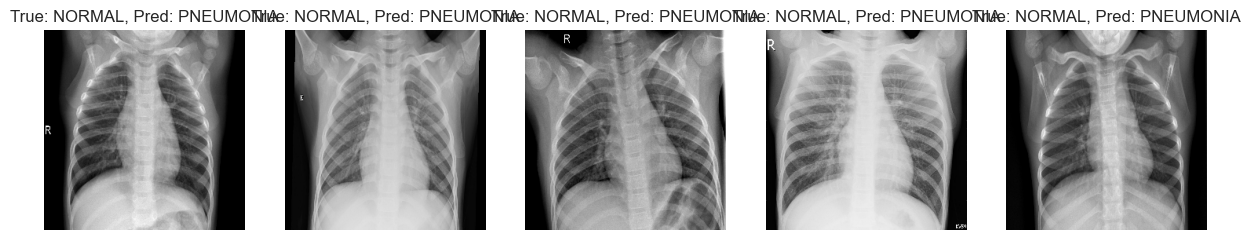

In [32]:
import numpy as np

def analyze_errors(model, dataset, class_labels):
    misclassified_images = []
    misclassified_labels = []

    for images, labels in dataset:
        predictions = (model.predict(images) > 0.5).astype("int32")
        for i in range(len(predictions)):
            if predictions[i] != labels[i]:
                misclassified_images.append(images[i].numpy())
                misclassified_labels.append((labels[i].numpy(), predictions[i][0]))

    return misclassified_images, misclassified_labels

misclassified_images, misclassified_labels = analyze_errors(model, test_ds, class_labels)

# Visualize misclassified images
def visualize_errors(misclassified_images, misclassified_labels, num_images=5):
    fig, axs = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        axs[i].imshow(misclassified_images[i].astype("uint8"))
        true_label, predicted_label = misclassified_labels[i]
        axs[i].set_title(f"True: {class_labels[true_label]}, Pred: {class_labels[predicted_label]}")
        axs[i].axis('off')
    plt.show()

visualize_errors(misclassified_images, misclassified_labels, num_images=5)


In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model(model, dataset):
    y_true = []
    y_pred = []

    for images, labels in dataset:
        predictions = (model.predict(images) > 0.5).astype("int32")
        y_true.extend(labels.numpy())
        y_pred.extend(predictions)

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

evaluate_model(model, test_ds)


1/1 [==============================] - 1s 906ms/step
Precision: 0.6250, Recall: 1.0000, F1-Score: 0.7692
